In [36]:
from skimage.filters import gabor_kernel
from skimage import io
from skimage.transform import resize
from matplotlib import pyplot as plt 
import numpy as np

import math

In [37]:
filterbank = []
# frequencies = (math.pi/2) * math.sqrt(2)**(-np.random.randint(0,5,(64,3)))
# thetas = []

0.3 1.0 0.0
(13, 13)
0.3 0.8 0.0
(15, 15)
0.3 0.6 0.0
(21, 21)
0.3 0.4 0.0
(29, 29)
0.5 1.0 0.0
(9, 9)
0.5 0.8 0.0
(11, 11)
0.5 0.6 0.0
(13, 13)
0.5 0.4 0.0
(19, 19)
0.65 1.0 0.0
(7, 7)
0.65 0.8 0.0
(9, 9)
0.65 0.6 0.0
(11, 11)
0.65 0.4 0.0
(15, 15)
0.3 1.0 0.196349375
(13, 13)
0.3 0.8 0.196349375
(15, 15)
0.3 0.6 0.196349375
(19, 19)
0.3 0.4 0.196349375
(29, 29)
0.5 1.0 0.196349375
(9, 9)
0.5 0.8 0.196349375
(11, 11)
0.5 0.6 0.196349375
(13, 13)
0.5 0.4 0.196349375
(19, 19)
0.65 1.0 0.196349375
(7, 7)
0.65 0.8 0.196349375
(9, 9)
0.65 0.6 0.196349375
(11, 11)
0.65 0.4 0.196349375
(15, 15)
0.3 1.0 0.39269875
(13, 13)
0.3 0.8 0.39269875
(15, 15)
0.3 0.6 0.39269875
(19, 19)
0.3 0.4 0.39269875
(27, 27)
0.5 1.0 0.39269875
(9, 9)
0.5 0.8 0.39269875
(9, 9)
0.5 0.6 0.39269875
(13, 13)
0.5 0.4 0.39269875
(17, 17)
0.65 1.0 0.39269875
(7, 7)
0.65 0.8 0.39269875
(7, 7)
0.65 0.6 0.39269875
(9, 9)
0.65 0.4 0.39269875
(13, 13)
0.3 1.0 0.5890481249999999
(11, 11)
0.3 0.8 0.5890481249999999
(13, 13)
0.

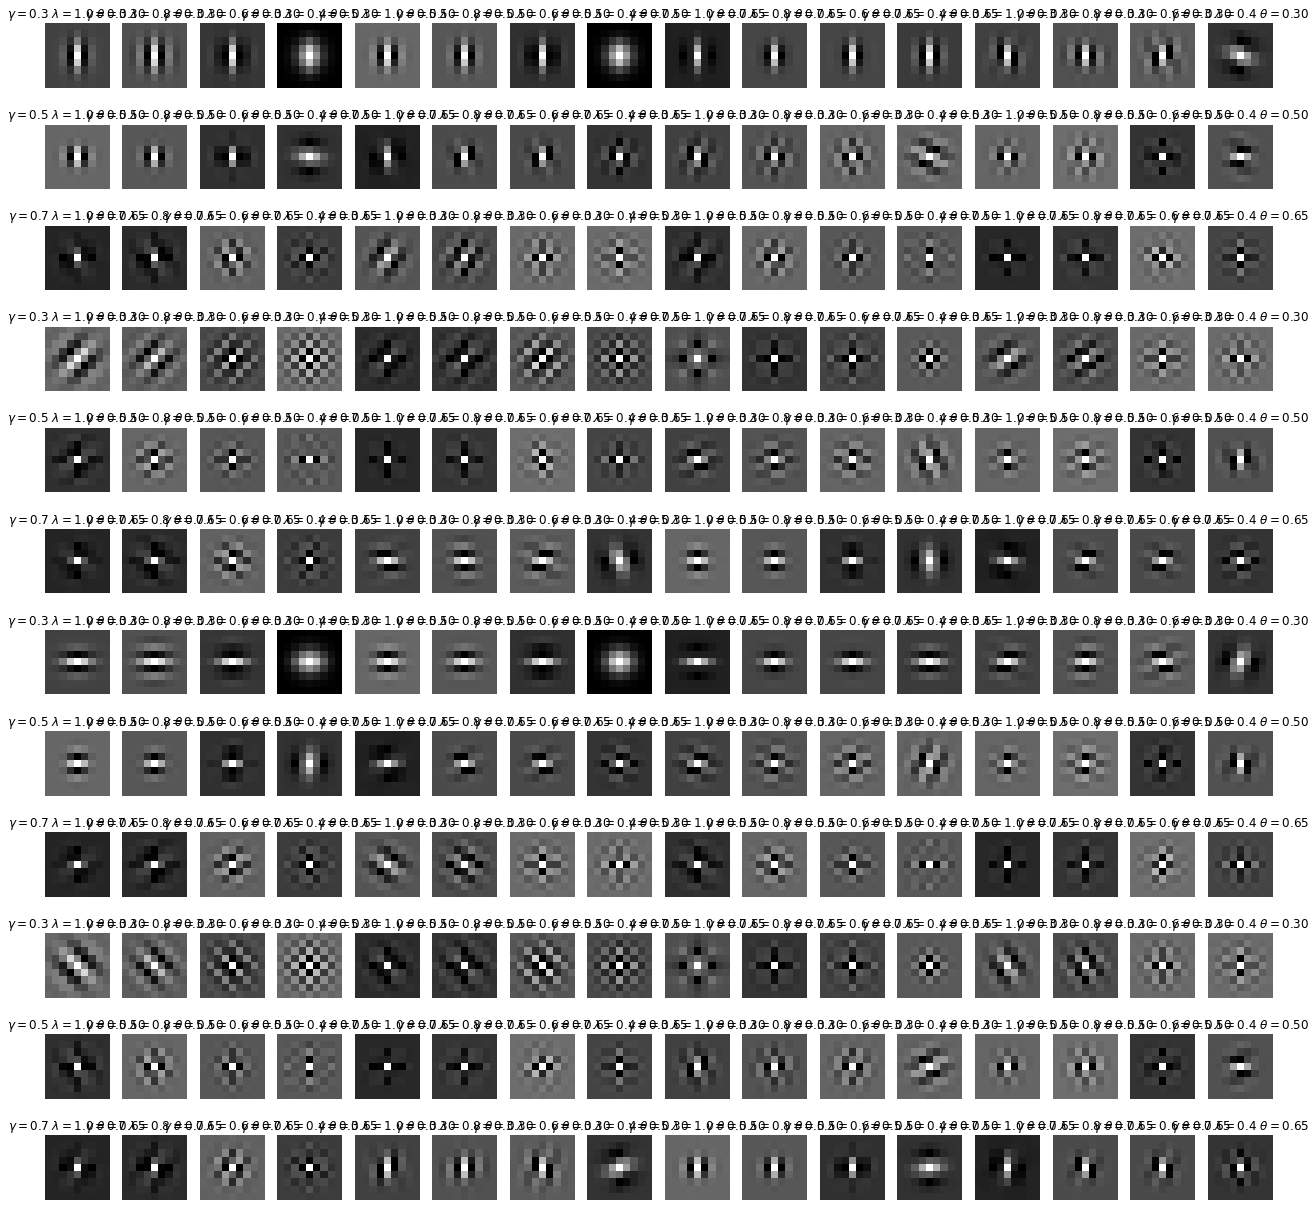

In [38]:
fig = plt.subplots(12, 16, figsize=(22,22))
filterbank = []
cnt = 0
for angle in np.linspace(0.0, 3.14159, 16, endpoint=False):
  for freq in [0.3, 0.5, 0.65]:
    # cnt = cnt + 1
    # gk = gabor_kernel(frequency=freq)
    # plt.subplot(3, 5, cnt)
    # plt.imshow(gk.real, cmap='gray')
    # print(gk.real.shape)
    # # plt.colorbar()
    # plt.axis('off')
    # plt.title("$\\gamma=${0:0.1f}".format(freq))
    for band in [1.0, 0.8, 0.6, 0.4]:
      print(freq, band, angle)
      cnt = cnt + 1
      gk = gabor_kernel(frequency=freq, bandwidth=band, theta=angle)
      plt.subplot(12, 16, cnt)
      gf = resize(gk.real,(9,9),anti_aliasing=False)
      gf = gf - np.min(gf)
      gf = gf/np.max(gf)
      gf = gf * 0.6
      gf = gf - 0.3
      filterbank.append(gf)
      plt.imshow(gf, cmap='gray')
      print(gk.real.shape)
      # plt.colorbar()
      plt.axis('off')
      plt.title("$\\gamma=${0:0.1f} $\\lambda=${1:0.1f} $\\theta=${0:0.2f}".format(freq,band,angle))
plt.show()

In [39]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


In [40]:
# Importing the Keras libraries and packages
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Activation
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop, Adam

# dimensionality of input and latent encoded representations
inpt_dim = (32, 32, 3)

inpt_img = Input(shape=inpt_dim)

# Block 1
cl1 = Conv2D(64, (9, 9), strides=(2, 2),activation='relu', input_shape = inpt_dim)(inpt_img)
bnl2 = BatchNormalization()(cl1)
# afl3 = Activation('relu')(bnl2)
pl4 = MaxPooling2D(pool_size = (2, 2))(bnl2)

# Adding a second convolutional layer
cl5 = Conv2D(128, (3, 3), strides=(1, 1), activation='relu')(pl4)
bnl6 = BatchNormalization()(cl5)
# afl7 = Activation('relu')(bnl6)
pl8 = MaxPooling2D(pool_size = (2, 2))(bnl6)
bnl9 = BatchNormalization()(pl8)

# Step 3 - Flattening
fl10 = Flatten()(bnl9)

# Step 4 - Full connection
dol11 = Dropout(0.5)(fl10)
dl12 = Dense(units = 256, activation = 'relu')(dol11)
dol13 = Dropout(0.2)(dl12)
dl14 = Dense(units = 64, activation = 'relu')(dol13)
dol15 = Dropout(0.1)(dl14)
output = Dense(units = 10, activation = 'sigmoid')(dol15)

classifier = Model(inpt_img, output)

# Compiling the CNN
opt = RMSprop(learning_rate=0.001)
# opt = Adam(learning_rate=0.01)

classifier.compile(optimizer = opt, loss = 'binary_crossentropy', 
                   metrics = ['accuracy'])

print(classifier.summary())

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)        15616     
_________________________________________________________________
batch_normalization_6 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
batch_normalization_7 (Batch (None, 4, 4, 128)         512       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 128)        

In [41]:
np.array(filterbank).shape

(192, 9, 9)

In [42]:
cnnl1 = classifier.layers[1].name   # get the name of the first conv layer
W = classifier.get_layer(name=cnnl1).get_weights()[0]   #get the filters
wshape = W.shape  #save the original shape

In [43]:
wshape

(9, 9, 3, 64)

In [45]:
gabor_filters = np.empty(wshape, dtype='float32')
for kernel_index in range(wshape[3]):
    for channel_index in range(3):
        gabor_filters[:,:,channel_index, kernel_index] = filterbank[kernel_index+channel_index]
# for k in range(0,wshape[3],3):
#   gabor_filters[:,:,0,k] = filterbank[k]
#   gabor_filters[:,:,1,k] = filterbank[k]
#   gabor_filters[:,:,2,k] = filterbank[k]


In [46]:
# Fitting the CNN to the images

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10,  
                              min_delta=1e-4, mode='min', verbose=1)

stop_alg = EarlyStopping(monitor='val_loss', patience=35, 
                         restore_best_weights=True, verbose=1)

hist = classifier.fit(x_train, y_train, batch_size=100, epochs=1000, 
                   callbacks=[stop_alg, reduce_lr], shuffle=True, 
                   validation_data=(x_test, y_test))

classifier.save_weights("cnn.hdf5")


Epoch 1/1000
500/500 [==============================] - 17s 34ms/step - loss: 0.2772 - accuracy: 0.3544 - val_loss: 0.2460 - val_accuracy: 0.4381
Epoch 2/1000
500/500 [==============================] - 18s 37ms/step - loss: 0.2293 - accuracy: 0.4735 - val_loss: 0.2352 - val_accuracy: 0.4509
Epoch 3/1000
500/500 [==============================] - 21s 41ms/step - loss: 0.2126 - accuracy: 0.5209 - val_loss: 0.2221 - val_accuracy: 0.4902
Epoch 4/1000
500/500 [==============================] - 22s 43ms/step - loss: 0.2005 - accuracy: 0.5558 - val_loss: 0.2307 - val_accuracy: 0.4544
Epoch 5/1000
500/500 [==============================] - 23s 46ms/step - loss: 0.1928 - accuracy: 0.5722 - val_loss: 0.2308 - val_accuracy: 0.4595
Epoch 6/1000
500/500 [==============================] - 22s 44ms/step - loss: 0.1854 - accuracy: 0.5931 - val_loss: 0.1711 - val_accuracy: 0.6221
Epoch 7/1000
500/500 [==============================] - 21s 43ms/step - loss: 0.1791 - accuracy: 0.6066 - val_loss: 0.2592 -

500/500 [==============================] - 23s 45ms/step - loss: 0.1055 - accuracy: 0.7855 - val_loss: 0.1278 - val_accuracy: 0.7418
Epoch 55/1000
500/500 [==============================] - 23s 45ms/step - loss: 0.1057 - accuracy: 0.7854 - val_loss: 0.1288 - val_accuracy: 0.7333
Epoch 56/1000
500/500 [==============================] - 22s 45ms/step - loss: 0.1044 - accuracy: 0.7863 - val_loss: 0.1280 - val_accuracy: 0.7376
Epoch 57/1000
500/500 [==============================] - 21s 42ms/step - loss: 0.1049 - accuracy: 0.7856 - val_loss: 0.1299 - val_accuracy: 0.7292
Epoch 58/1000
500/500 [==============================] - 22s 45ms/step - loss: 0.1044 - accuracy: 0.7883 - val_loss: 0.1263 - val_accuracy: 0.7372
Epoch 59/1000
500/500 [==============================] - 23s 46ms/step - loss: 0.1039 - accuracy: 0.7876 - val_loss: 0.1208 - val_accuracy: 0.7512
Epoch 60/1000
500/500 [==============================] - 22s 45ms/step - loss: 0.1029 - accuracy: 0.7895 - val_loss: 0.1241 - val_ac

500/500 [==============================] - 24s 49ms/step - loss: 0.0923 - accuracy: 0.8148 - val_loss: 0.1198 - val_accuracy: 0.7570
Epoch 108/1000
499/500 [============================>.] - ETA: 0s - loss: 0.0923 - accuracy: 0.8150
Epoch 00108: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
500/500 [==============================] - 24s 48ms/step - loss: 0.0923 - accuracy: 0.8149 - val_loss: 0.1204 - val_accuracy: 0.7562
Epoch 109/1000
500/500 [==============================] - 25s 50ms/step - loss: 0.0917 - accuracy: 0.8166 - val_loss: 0.1197 - val_accuracy: 0.7597
Epoch 110/1000
500/500 [==============================] - 25s 50ms/step - loss: 0.0916 - accuracy: 0.8165 - val_loss: 0.1195 - val_accuracy: 0.7591
Epoch 111/1000
500/500 [==============================] - 25s 50ms/step - loss: 0.0920 - accuracy: 0.8148 - val_loss: 0.1201 - val_accuracy: 0.7585
Epoch 112/1000
500/500 [==============================] - 24s 49ms/step - loss: 0.0917 - accuracy: 0.8162 - va

Epoch 157/1000
500/500 [==============================] - 23s 47ms/step - loss: 0.0898 - accuracy: 0.8201 - val_loss: 0.1195 - val_accuracy: 0.7597
Epoch 158/1000
500/500 [==============================] - 22s 45ms/step - loss: 0.0908 - accuracy: 0.8194 - val_loss: 0.1196 - val_accuracy: 0.7600
Epoch 159/1000
500/500 [==============================] - 23s 46ms/step - loss: 0.0902 - accuracy: 0.8208 - val_loss: 0.1195 - val_accuracy: 0.7596
Epoch 00159: early stopping


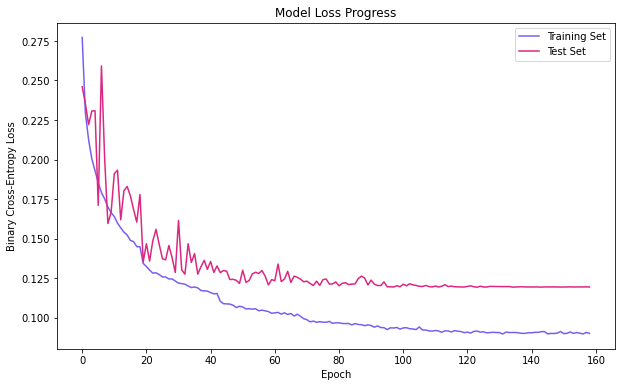

In [50]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model Loss Progress')
plt.ylabel('Binary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
plt.savefig('cnn-gabor.cifar10.loss.png', dpi=350, bbox_inches='tight')
plt.show()

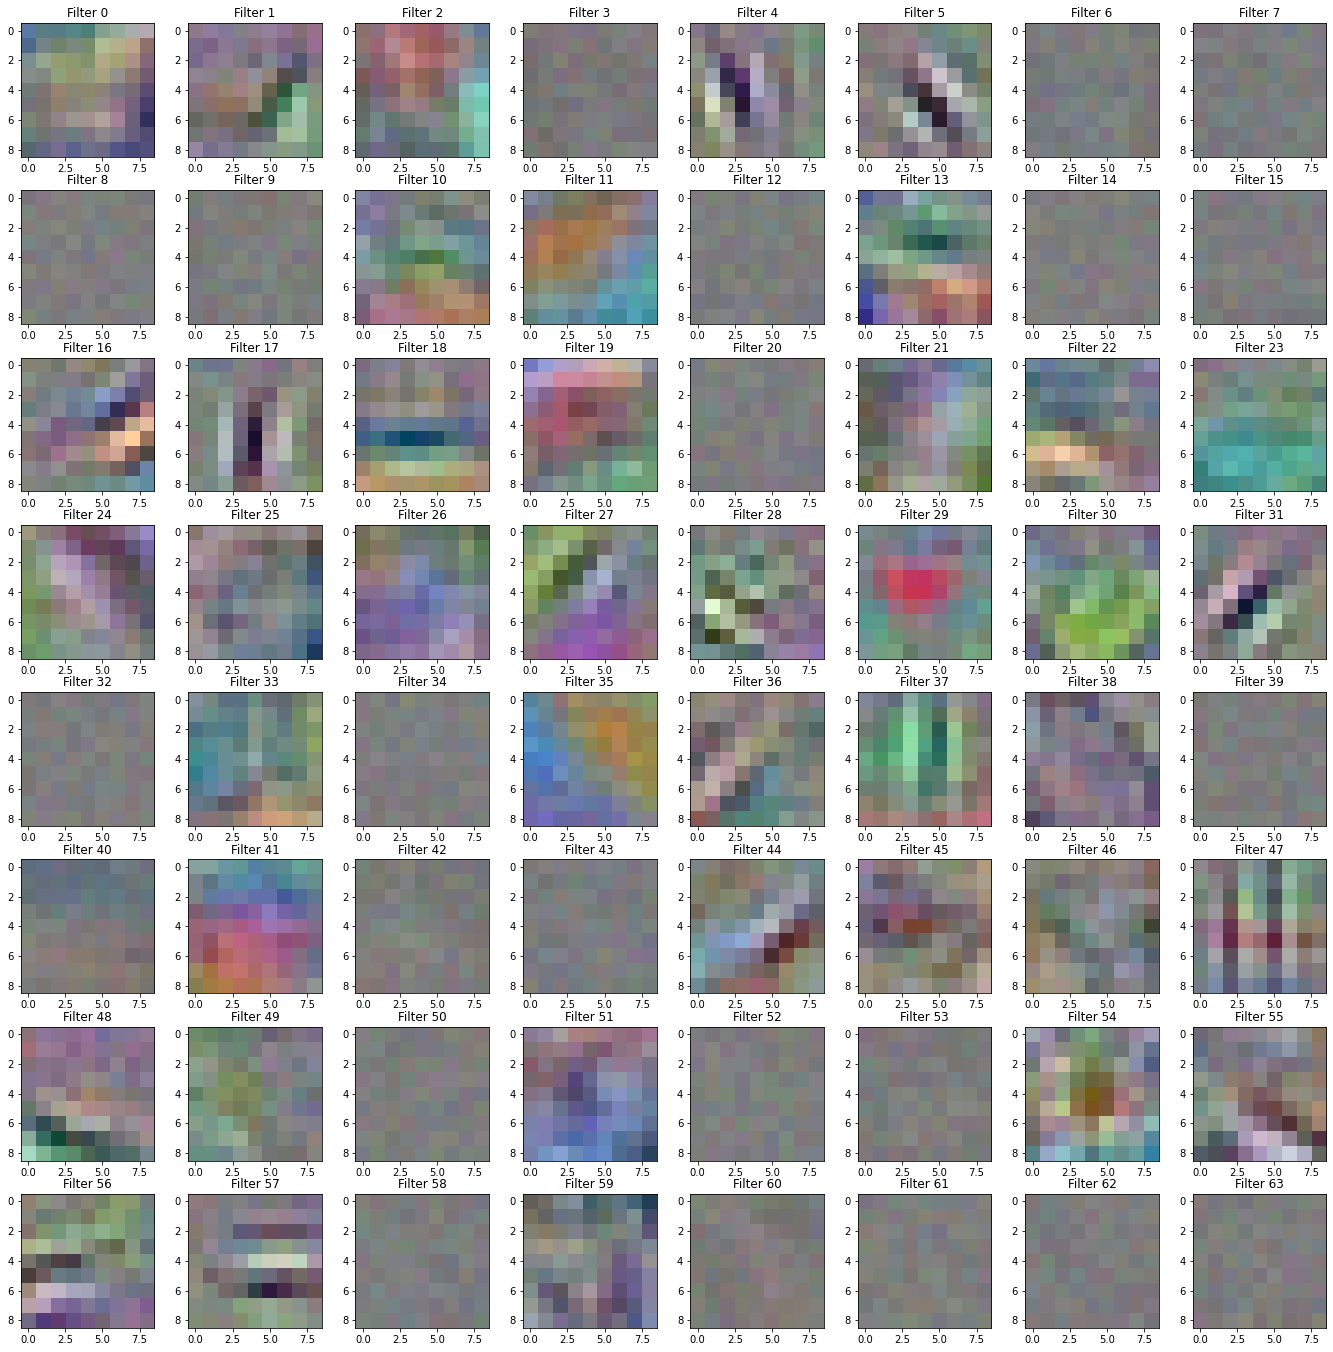

In [51]:
from sklearn.preprocessing import MinMaxScaler

cnnl1 = classifier.layers[1].name   # get the name of the first conv layer
W = classifier.get_layer(name=cnnl1).get_weights()[0]   #get the filters
wshape = W.shape  #save the original shape

# this part will scale to [0, 1] for visualization purposes
scaler = MinMaxScaler()
scaler.fit(W.reshape(-1,1))
W = scaler.transform(W.reshape(-1,1))
W = W.reshape(wshape)

# since there are 64 filters, we will display them 8x8
fig, axs = plt.subplots(8,8, figsize=(24,24))
fig.subplots_adjust(hspace = .25, wspace=.001)
axs = axs.ravel()
for i in range(W.shape[-1]):
  # we reshape to a 3D (RGB) image shape and display
  h = np.reshape(W[:,:,:,i], (9,9,3))
  axs[i].imshow(h)
  axs[i].set_title('Filter ' + str(i))    
plt.savefig("cnn-gabor.full.filters.png", bbox_inches='tight', dpi=350)

-0.44671795 0.44239035


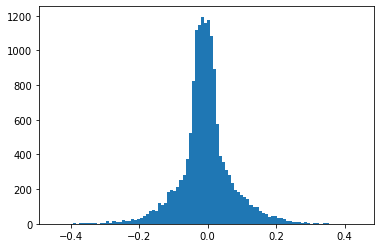

In [49]:
cnnl1 = classifier.layers[1].name   # get the name of the first conv layer
W = classifier.get_layer(name=cnnl1).get_weights()[0]
plt.hist(W.ravel(), bins=100)
print(np.min(W),np.max(W))